# Polynomial regression 2.0

In [7]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m, n = X.shape 
    J = np.zeros(max_iterations)

    y = y.reshape(m, 1)
    
    w = np.zeros(shape=(n, 1))
    
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,w) - y)) / m;
        w = w - alpha*grad
        J[iteration] = sum((np.dot(X, w) - y) ** 2).item()

    return [w, J]

## Higher-degree Polynomial Regression

In [10]:
import numpy as np

# This is a single feature, with 50 data points
feat = np.array([ 3.69, -0.01,  3.92,  3.76,  4.77,  2.65, -3.2 , -3.68,  4.84,
        2.35, -3.46,  3.36,  0.05, -2.43,  4.5 ,  2.99, -4.58, -2.38,
        4.75, -0.99,  2.43,  1.03, -0.91,  0.49, -1.07, -4.56,  2.7 ,
       -1.89, -4.46, -3.22,  4.11, -1.4 , -2.15, -3.08,  1.22,  4.15,
       -3.32, -0.96,  2.28, -0.22,  1.63, -3.16,  0.57,  1.12,  0.46,
       -4.42, -1.98, -4.59, -3.27,  3.77])

# And this is the output for each of the 50 data points
out = np.array([ -4.01526321,   4.91472839,  -6.45656423,  -2.62612898,
        -8.51413128,   3.34151409,  12.88771229,  34.65904607,
       -13.35431265,   4.30981981,  21.88485042,   1.12385015,
        -2.91774249,  14.50057692,  -1.24198533,  -4.55757528,
        45.46247156,   8.26033485, -17.30334323,  -9.70654351,
       -11.24523311, -10.24578944,   2.52139723,   9.46442395,
        -2.6732785 ,  47.77493771,  -1.3560507 ,  -3.87657515,
        47.12672411,  19.07990287,  -0.9455647 ,   0.35427309,
         9.80390966,  19.42353943,   3.11970979,   3.44865065,
        21.42035593,  -7.88242488,   5.64544367,  10.20227577,
        -0.62195752,  14.75901715,   9.12831525,   7.21057155,
         4.53708356,  45.98559999,  -3.86594125,  50.79311745,
        25.99250789,  -3.46524068])

Let's make a plot of the above samples

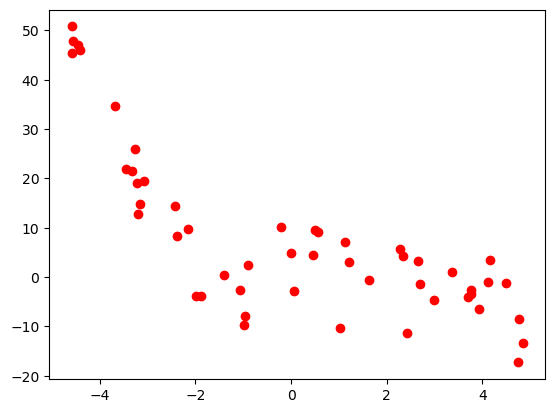

In [13]:
import matplotlib.pyplot as plt

plt.plot(feat, out, 'ro') 

In order to use the linear gradient descent above to fit a polynomial, what we have to do is generate new features, from the existing ones. For example we could generate a new feature $feat_2$ and calculate its values as the square of $feat$: $feat_2 = feat^2$.

Similarly we could create more new features like:

$feat_3 = feat^3$

$feat_4 = feat^4$

$...$

Then we would have to normalise each of these new features, using its mean and standard deviation.

To make our life easier, we will define a function that automates this process. It creates features up to a degree, calculates the means and standard deviations, and uses them to normalise them. The output would be the new design matrix for our problem.

In [17]:
def mapFeatureAndNormalise_Polynomial(x, degree = 6, preCalcMeans = None, preCalcStd = None):
      
    x = x.reshape(-1, 1) 
    
    DesignMatrix = np.ones_like(x)
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

Let's create such new features up to the power of 2.

In [22]:
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = 2)
print("Shape of design matrix: ", X.shape)
print("Shape of means (and sigma): ", mu.shape)

Shape of design matrix:  (50, 3)
Shape of means (and sigma):  (3,)


Let's now use our gradient descent function to fit a 2-degree polynomial model to the same data. 

Estimated weights:  [[  7.84509192]
 [-13.60627612]
 [  7.01751284]]


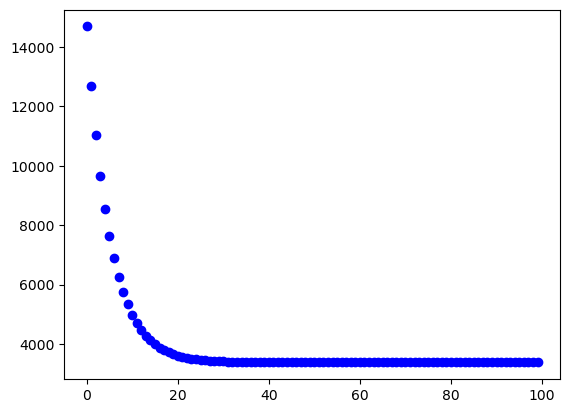

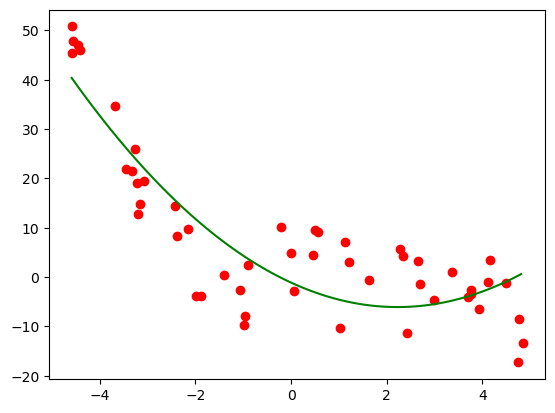

In [25]:
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = 2)

w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)  

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  

plt.figure()
plt.plot(feat, out, 'ro') 

xx = np.arange(feat.min(),feat.max(), 0.1) 


yy = [w[0] + w[1] * (x-mu[1])/sigma[1] + w[2] * (x**2-mu[2])/w[2] for x in xx]

plt.plot(xx, yy, 'g') 

Let's look in a more efficient way to pass new data through our model. We will create and normalise new features using the same `map_feature()` function, and the pre-calculated means and standard deviations. Then it should be just a matter of calculating a weighted sum (or else a dot product, vectorising this operation). It is important to see that

$y = w_0 + w_1 * x + w_2 * x^2$

is equivalent to 

$y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2$, where $x_0 = 1$, $x_1 = x$ and $x_2 = x^2$

Importantly, doing this in this vectorised form, allows us to change the number of dimensions (degrees) without having to change our code.

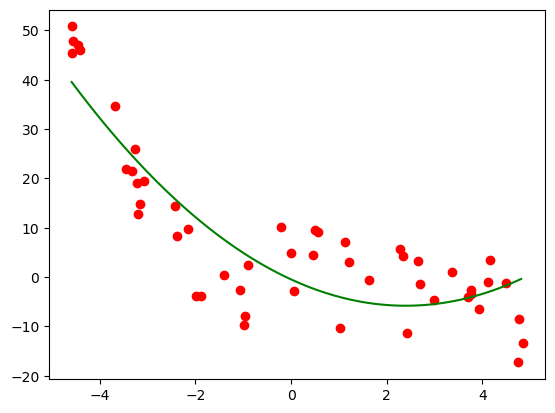

In [27]:
xx = np.arange(feat.min(),feat.max(), 0.1) 

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = 2, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w

plt.figure() 
plt.plot(feat, out, 'ro')
plt.plot(xx, yy, 'g') 
plt.show()

Final cost value of the above fit

In [30]:
# The final Cost value is the last value we have in the list of costs (the cost at the very last iteration). 
print('Final cost:{0}'.format(J[-1]))

Final cost:3377.911153774626


Now fit a 3-degree polynomial and a 4-degree polynomial

Estimated weights:  [[  7.84509192]
 [ -2.76031548]
 [  7.39547525]
 [-12.08292218]]
Final cost:  1635.6102190304018


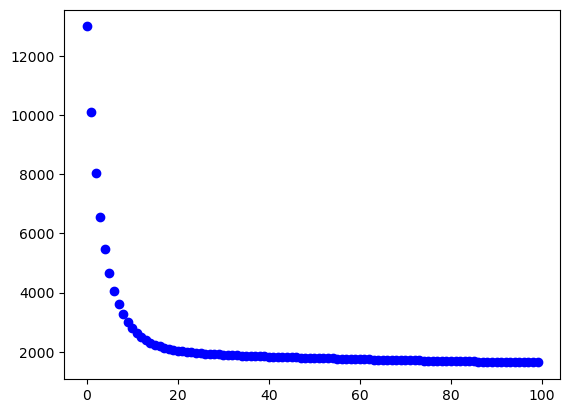

<Figure size 640x480 with 0 Axes>

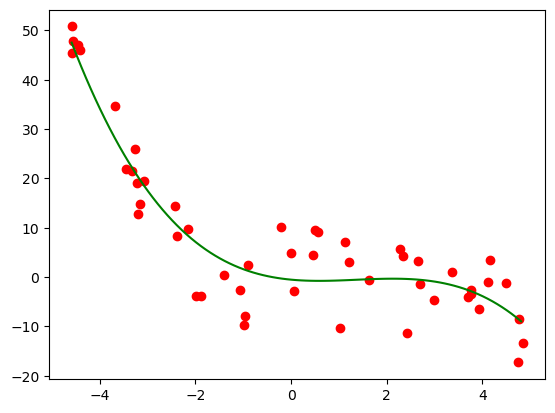

In [33]:
D = 3 # Change this to the degree you want
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

plt.figure()
xx = np.arange(feat.min(),feat.max(), 0.1) 

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = D, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w 

plt.figure() 
plt.plot(feat, out, 'ro') 
plt.plot(xx, yy, 'g') 

Estimated weights:  [[  7.84509192]
 [ -2.72199217]
 [  4.64446176]
 [-12.20870513]
 [  2.81869134]]
Final cost:  1632.9442462016282


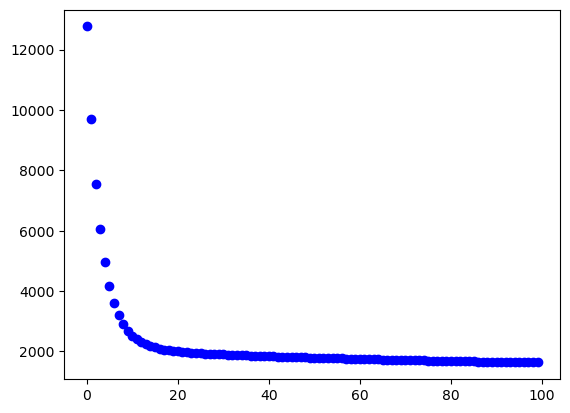

<Figure size 640x480 with 0 Axes>

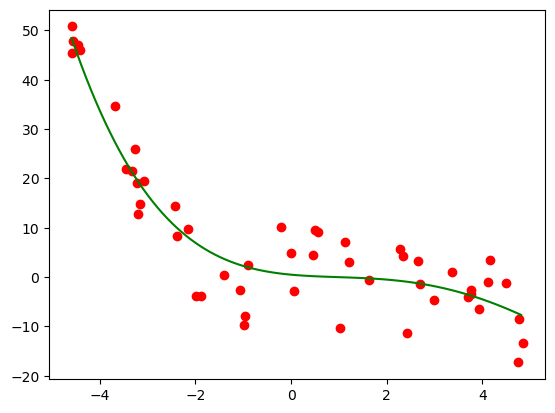

In [35]:
D = 4 # Change this to the degree you want
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

plt.figure()
xx = np.arange(feat.min(),feat.max(), 0.1) 

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = D, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w 

plt.figure() 
plt.plot(feat, out, 'ro') 
plt.plot(xx, yy, 'g') 

Now by reusing the above code to create the appropriate design matrices and try to fit polynomials of up to degree 15

Text(0, 0.5, 'Final Cost')

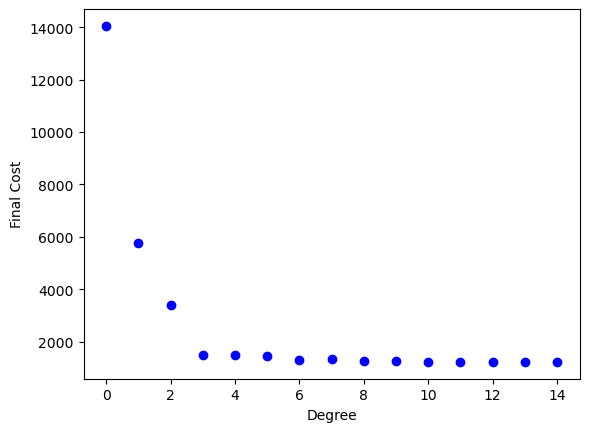

In [38]:
costs = []

for D in np.arange(15):
    X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
    w, J = GradientDescent_np(X, out, max_iterations = 5000, alpha=0.1)
    
    costs.append(J[-1])

plt.figure()
plt.plot(costs, 'bo')
plt.xlabel("Degree")
plt.ylabel("Final Cost")